# **Wisconsin Breast Cancer Database**

## **PCA - Perceptron - GaussianNB - SVM**

> 💾 Wisconsin Breast Cancer Database 

-  https://www.kaggle.com/datasets/roustekbio/breast-cancer-csv

> 💾 Breast Cancer Prediction

- https://www.kaggle.com/datasets/adhyanmaji31/breast-cancer-prediction

> ✍️ Data Science Tutorial For Beginners

-  https://www.kaggle.com/code/muhammetcakmak/data-science-tutorial-for-beginners

> ✍️ PCA - Perceptron - GaussianNB - SVM

- https://www.kaggle.com/code/angeloruggieridj/pca-perceptron-gaussiannb-svm

> ✍️  Breast Cancer Wisconsin--Classification

- https://www.kaggle.com/code/chongchong33/breast-cancer-wisconsin-classification

> ✍️ Breast Cancer Classification (98% accuracy)

- https://www.kaggle.com/code/adhyanmaji31/breast-cancer-classification-98-accuracy
 

In [3]:
#Import delle librerie richieste per il funzionamento
import itertools
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

%matplotlib inline

In [4]:
import pandas as pd
url="https://drive.google.com/file/d/1EVPpKpQtm8Ky36RdlzrR3H4RFmKVejnQ/view?usp=sharing"
path='https://drive.google.com/uc?id='+url.split('/')[-2]
print("▶ 공유파일 링크변환 경로명 : ", path)

col_names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

dataset=pd.read_csv(path, header=0, names = col_names)
array = dataset.values

dataset.head()

▶ 공유파일 링크변환 경로명 :  https://drive.google.com/uc?id=1EVPpKpQtm8Ky36RdlzrR3H4RFmKVejnQ


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
array

array([[1000025, 5, 1, ..., 1, 1, 2],
       [1002945, 5, 4, ..., 2, 1, 2],
       [1015425, 3, 1, ..., 1, 1, 2],
       ...,
       [888820, 5, 10, ..., 10, 2, 4],
       [897471, 4, 8, ..., 6, 1, 4],
       [897471, 4, 8, ..., 4, 1, 4]], dtype=object)

In [8]:
#Rimozione della feature _Sample code number_
dataset.drop(['Sample code number'],axis = 1, inplace = True)

In [9]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [13]:
dataset['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [14]:
dataset.replace('?',0, inplace=True)

In [15]:
from sklearn.impute import SimpleImputer
# Conversione del DataFrame in array NumPy per applicare il metodo Imputer().
values = dataset.values

imputer = SimpleImputer()
imputedData = imputer.fit_transform(values)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [17]:
#Split del dataset in X e Y
X = normalizedData[:,0:9] #Esclude la colonna relativa alla classe
Y = normalizedData[:,9] #Considera esclusivamente la classe come feature target

#Impostazione del seed
seed = 1

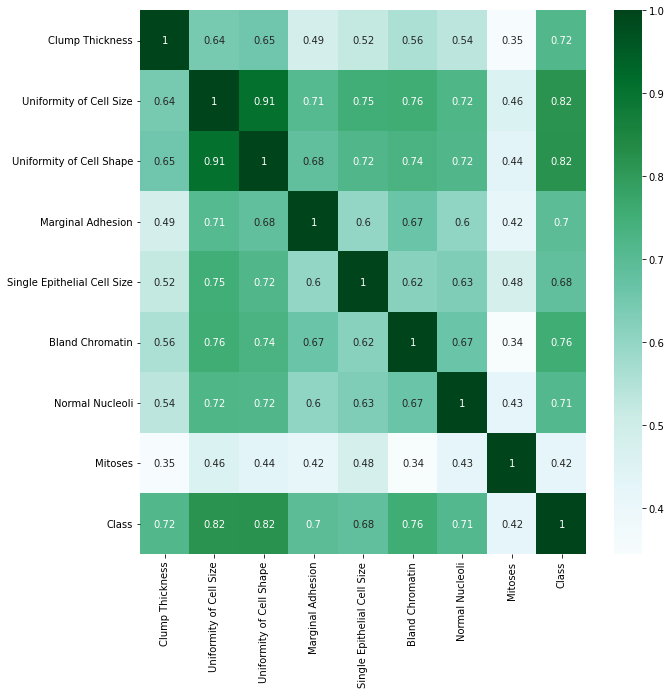

In [18]:
names = dataset.columns

# plot correlation matrix
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.BuGn)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

y = dataset['Class']
dataset.drop(['Class'], axis = 1, inplace = True)

In [20]:
from sklearn.preprocessing import StandardScaler
x = dataset

sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [21]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42, shuffle=True)

In [22]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)

PCA()

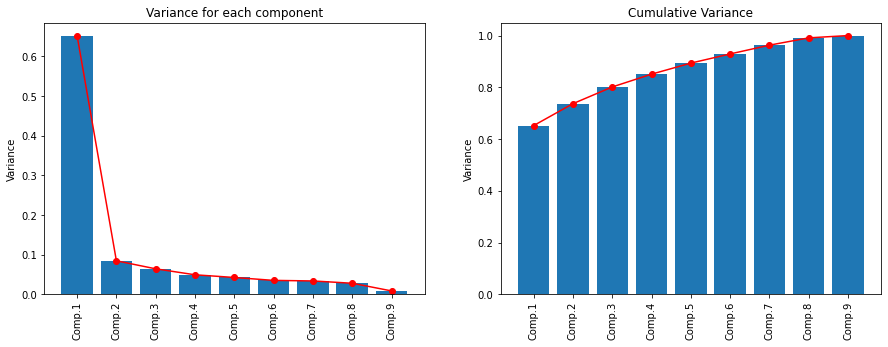

In [23]:
asse_y = pca.explained_variance_ratio_
asse_x = np.arange(len(asse_y)) + 1

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(asse_x, asse_y)
plt.plot(asse_x, asse_y, "ro-")
plt.title("Variance for each component")
plt.xticks(asse_x, ["Comp."+str(i) for i in asse_x], rotation=90)
plt.ylabel("Variance")

y2 = np.cumsum((pca.explained_variance_ratio_))

plt.subplot(1, 2, 2)
plt.bar(asse_x,y2)
plt.plot(asse_x, y2, "ro-")
plt.xticks(asse_x, ["Comp."+str(i) for i in asse_x], rotation=90)
plt.title("Cumulative Variance")
plt.ylabel("Variance")
plt.show()

In [24]:
pca = PCA(n_components=5)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

#Stampa dei valori della PCA
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.singular_values_>=1)

[[ 0.2969142   0.37845649  0.38091446  0.31899759  0.34143385  0.34837921
   0.36541481  0.33405807  0.19669629]
 [-0.10397204 -0.05273015 -0.10044127 -0.12264138  0.20970355 -0.18343615
  -0.23293309  0.08147002  0.90706141]
 [-0.85691868  0.0280762  -0.03908356  0.41818028  0.14266065 -0.08611377
   0.20093316  0.13165465 -0.05500098]
 [ 0.04661901 -0.22998732 -0.21902731  0.48223385 -0.40651748  0.56351586
   0.00437552 -0.32844771  0.27148926]
 [-0.10477865  0.02377163  0.03801995 -0.09711918  0.67820526  0.32026084
  -0.23067511 -0.58987596 -0.11783317]]
[5.88281792 0.76414107 0.58184592 0.44627808 0.38530449]
[0.65221378 0.08471847 0.06450785 0.04947777 0.04271778]
[53.57998827 19.31064059 16.85054329 14.75749658 13.7123517 ]
[ True  True  True  True  True]


In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_accuracy(used_model, best_config_gs, best_config_random_search):
    model = used_model(**best_config_gs)

    #Suddivisione delle dimensioni del training_set e raccoglimento del training_score e test_score
    #Impostando il valore di cross_validation = 10

    #Train_sizes: controlla il numero assoluto o relativo di esempi di training utilizzati per generare le curve di apprendimento. 
    #train_sizes = np.linspace (0.1, 1.0, 10) per usare 10 punti equidistanti per le dimensioni del set di dati di allenamento.
    train_sizes, train_scores, test_scores =\
                    learning_curve(estimator=model,
                                   X=x_train,
                                   y=y_train,
                                   train_sizes=np.linspace(0.1, 1.0, 10),
                                   cv=10,
                                   n_jobs=-1)

    #Calcolo delle medie e delle deviazioni standard sul training e test
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    #Plot dei valori della GridSearch() sul grafico
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    
    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='Training accuracy')

    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='Validation accuracy')

    #la funzione fill_between indica la varianza della stima colorando la regione di piano
    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.3, 1.03])
    plt.tight_layout()
    
    #RandomSearch e relativo grafico
    model = used_model(**best_config_random_search)

    #Suddivisione delle dimensioni del training_set e raccoglimento del training_score e test_score
    #Impostando il valore di cross_validation = 10

    #Train_sizes: controlla il numero assoluto o relativo di esempi di training utilizzati per generare le curve di apprendimento. 
    #train_sizes = np.linspace (0.1, 1.0, 10) per usare 10 punti equidistanti per le dimensioni del set di dati di allenamento.
    train_sizes, train_scores, test_scores =\
                    learning_curve(estimator=model,
                                   X=x_train,
                                   y=y_train,
                                   train_sizes=np.linspace(0.1, 1.0, 10),
                                   cv=10,
                                   n_jobs=-1)

    #Calcolo delle medie e delle deviazioni standard sul training e test
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.subplot(1, 2, 2)
    #Plot dei valori della GridSearch() sul grafico
    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='Training accuracy')

    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='Validation accuracy')

    #la funzione fill_between indica la varianza della stima colorando la regione di piano
    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.3, 1.03])
    plt.tight_layout()
    
    plt.show()

GridSearch():

Per l'applicazione della GridSearch ci sono 48 combinazioni
Migliore configurazione:  {'eta0': 1, 'penalty': 'l2', 'tol': 0.001}
Accuracy CV: 0.9693035977277509
Test accuracy: 0.952


RandomizedSearch():

Migliore configurazione:  {'tol': 1, 'penalty': 'l1', 'eta0': 0.001}
Accuracy CV: 0.9652219650746897
Test accuracy: 0.938


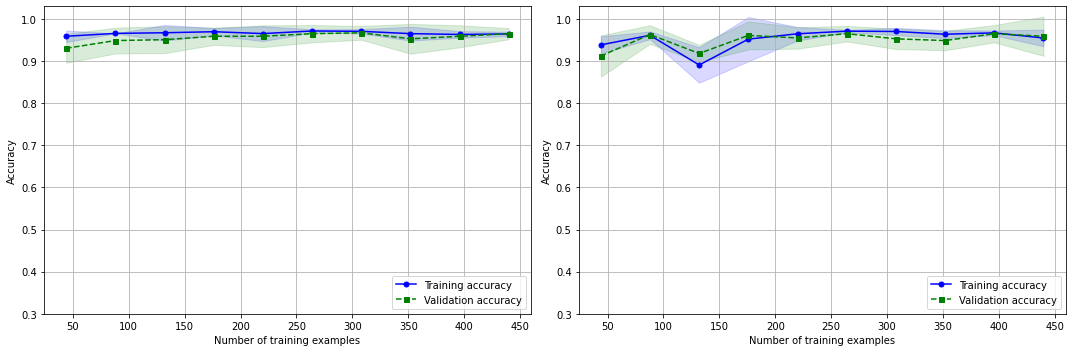

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

grid={'tol':[0.001,0.01,0.1,1], 'eta0': [0.001,0.01,0.1,1], 'penalty': ['l2','l1','elasticnet']}

ppn = Perceptron(random_state=1, n_jobs = -1, max_iter=1000)
ppn_cv=GridSearchCV(ppn,grid,cv=5)
ppn_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",ppn_cv.best_params_)
best_config_gs = ppn_cv.best_params_
print("Accuracy CV:",ppn_cv.best_score_)
ppn_cv = ppn_cv.best_estimator_
print('Test accuracy: %.3f' % ppn_cv.score(x_test, y_test))


#RandomizedSearch
n_iter_search = 10
random_search = RandomizedSearchCV(ppn, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(Perceptron, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

GridSearch():

Per l'applicazione della GridSearch ci sono 8 combinazioni
Migliore configurazione:  {'solver': 'lsqr', 'tol': 0.001}
Accuracy CV: 0.9590784767515255
Test accuracy: 0.967


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,




RandomizedSearch():

Migliore configurazione:  {'tol': 0.001, 'solver': 'lsqr'}
Accuracy CV: 0.9590784767515255
Test accuracy: 0.967


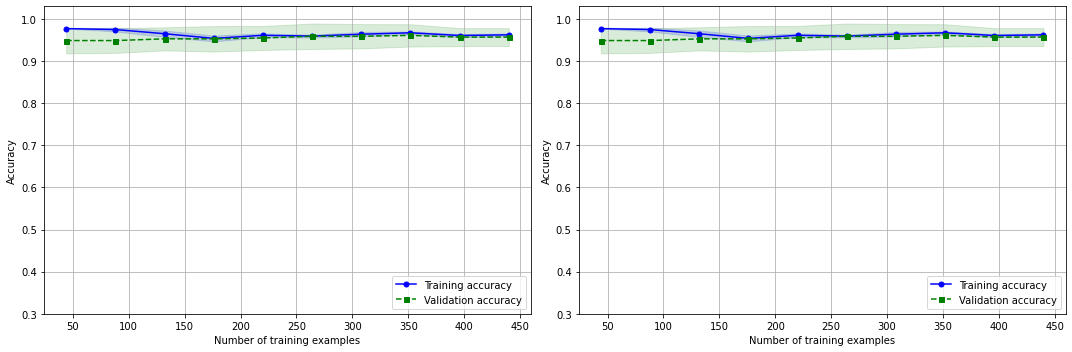

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

x_train_lda = x_train
y_train_lda = y_train


grid={'solver': ['lsqr', 'eigen'], 'tol':[0.001,0.01,0.1,1]}

lda = LDA()
lda_cv=GridSearchCV(lda,grid,cv=5)
lda_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",lda_cv.best_params_)
best_config_gs = lda_cv.best_params_
print("Accuracy CV:",lda_cv.best_score_)
lda_cv = lda_cv.best_estimator_
print('Test accuracy: %.3f' % lda_cv.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 10
random_search = RandomizedSearchCV(lda, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(LDA, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

In [28]:
from sklearn import linear_model

regr = linear_model.LinearRegression(n_jobs = -1)
regr.fit(x_train, y_train)

print('Accuracy of Linear regression classifier on training set: {:.2f}'
     .format(regr.score(x_train, y_train)))
print('Accuracy of Linear regression classifier on test set: {:.2f}'
     .format(regr.score(x_test, y_test)))

Accuracy of Linear regression classifier on training set: 0.83
Accuracy of Linear regression classifier on test set: 0.83


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=3)
x_poly_train = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)

model = LinearRegression(n_jobs = -1)
model.fit(x_poly_train, y_train)

print('Accuracy of Linear regression classifier on training set: {:.2f}'
     .format(model.score(x_poly_train, y_train)))
print('Accuracy of Linear regression classifier on test set: {:.2f}'
     .format(model.score(x_poly_test, y_test)))

Accuracy of Linear regression classifier on training set: 0.89
Accuracy of Linear regression classifier on test set: 0.78


GridSearch():

Per l'applicazione della GridSearch ci sono 60 combinazioni
Migliore configurazione:  {'C': 10, 'multi_class': 'auto', 'solver': 'newton-cg'}
Accuracy CV: 0.9631601094045866
Test accuracy: 0.962


RandomizedSearch():

Migliore configurazione:  {'solver': 'newton-cg', 'multi_class': 'ovr', 'C': 30}
Accuracy CV: 0.9631601094045866
Test accuracy: 0.962


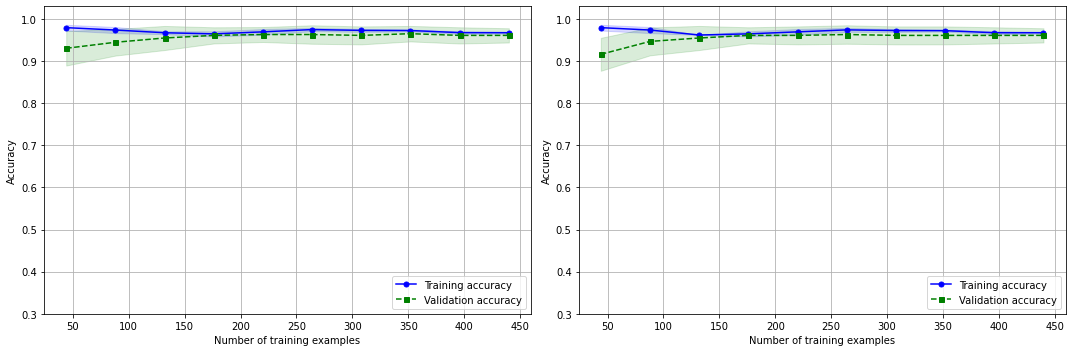

In [30]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
multiclass_values = ['auto', 'ovr', 'multinomial']
C = [x for x in range(10,100+1,20)]

grid={'solver':solvers, 'multi_class':multiclass_values, 'C':C}
logreg=LogisticRegression(random_state=1, max_iter=500)
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",logreg_cv.best_params_)
best_config_gs = logreg_cv.best_params_
print("Accuracy CV:",logreg_cv.best_score_)
logreg_be = logreg_cv.best_estimator_
print('Test accuracy: %.3f' % logreg_be.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 10
random_search = RandomizedSearchCV(logreg, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(LogisticRegression, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:4

GridSearch():

Per l'applicazione della GridSearch ci sono 18 combinazioni
Migliore configurazione:  {'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 1500}
Accuracy CV: 0.8667596601153305
Test accuracy: 0.902


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,




RandomizedSearch():

Migliore configurazione:  {'n_estimators': 1500, 'max_features': 'auto', 'criterion': 'mae'}
Accuracy CV: 0.8667596601153305
Test accuracy: 0.902


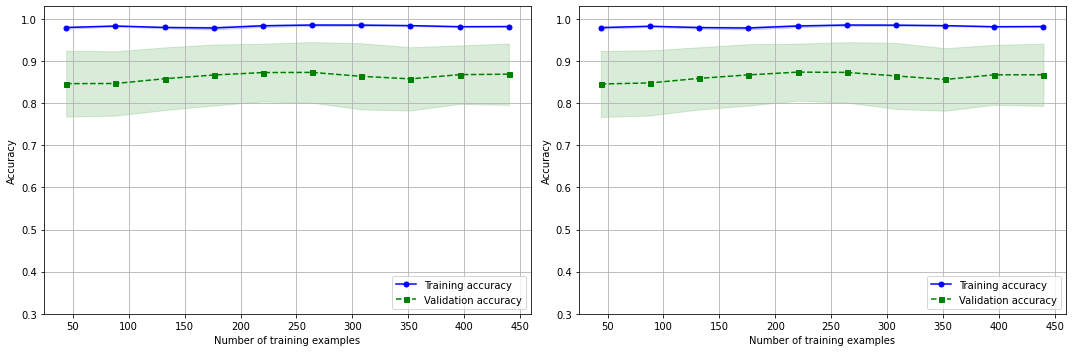

In [31]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

grid={'n_estimators':[x for x in range(1000,2000+1,500)], 'criterion':['mae','mse'], 'max_features':['auto', 'sqrt', 'log2']}
forest = RandomForestRegressor(random_state=1, n_jobs=-1)
forest_cv=GridSearchCV(forest,grid,cv=5)
forest_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",forest_cv.best_params_)
best_config_gs = forest_cv.best_params_
print("Accuracy CV:",forest_cv.best_score_)
forest_be = forest_cv.best_estimator_
print('Test accuracy: %.3f' % forest_be.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 10
random_search = RandomizedSearchCV(forest, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(RandomForestRegressor, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

ridge.fit(x_train, y_train)
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.156, test: 0.152
R^2 train: 0.829, test: 0.825


In [34]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

lasso.fit(x_train, y_train)
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.350, test: 0.326
R^2 train: 0.618, test: 0.625


In [36]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

elanet.fit(x_train, y_train)
y_train_pred = elanet.predict(x_train)
y_test_pred = elanet.predict(x_test)

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.246, test: 0.229
R^2 train: 0.732, test: 0.736


GridSearch():

Per l'applicazione della GridSearch ci sono 4 combinazioni
Migliore configurazione:  {'criterion': 'entropy', 'splitter': 'best'}
Accuracy CV: 0.9570376604249947
Test accuracy: 0.938


RandomizedSearch():

Migliore configurazione:  {'splitter': 'random', 'criterion': 'entropy'}
Accuracy CV: 0.9468546181359143
Test accuracy: 0.933


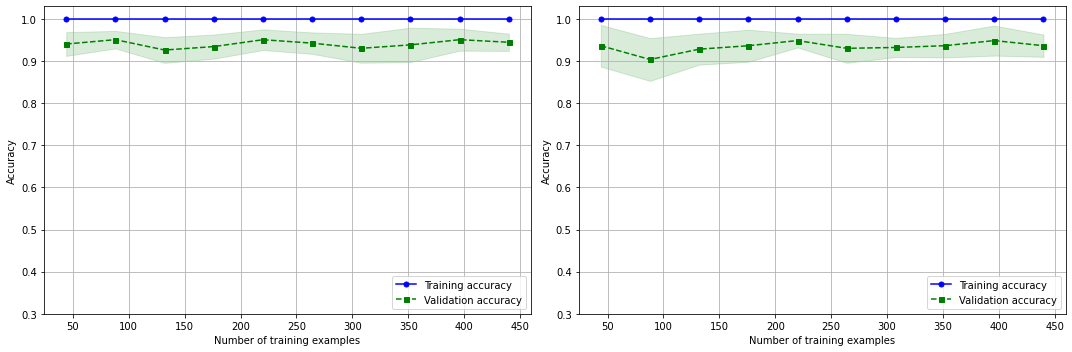

In [38]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


grid={'criterion':['gini','entropy'], 'splitter':['best', 'random']}

clf = DecisionTreeClassifier()
clf_cv=GridSearchCV(clf,grid,cv=5)
clf_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",clf_cv.best_params_)
best_config_gs = clf_cv.best_params_
print("Accuracy CV:",clf_cv.best_score_)
clf_be = clf_cv.best_estimator_
print('Test accuracy: %.3f' % clf_be.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 2
random_search = RandomizedSearchCV(clf, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(DecisionTreeClassifier, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

GridSearch():

Per l'applicazione della GridSearch ci sono 20 combinazioni
Migliore configurazione:  {'criterion': 'entropy', 'n_estimators': 15}
Accuracy CV: 0.9651798863875447
Test accuracy: 0.967


RandomizedSearch():

Migliore configurazione:  {'n_estimators': 15, 'criterion': 'entropy'}
Accuracy CV: 0.9651798863875447
Test accuracy: 0.967


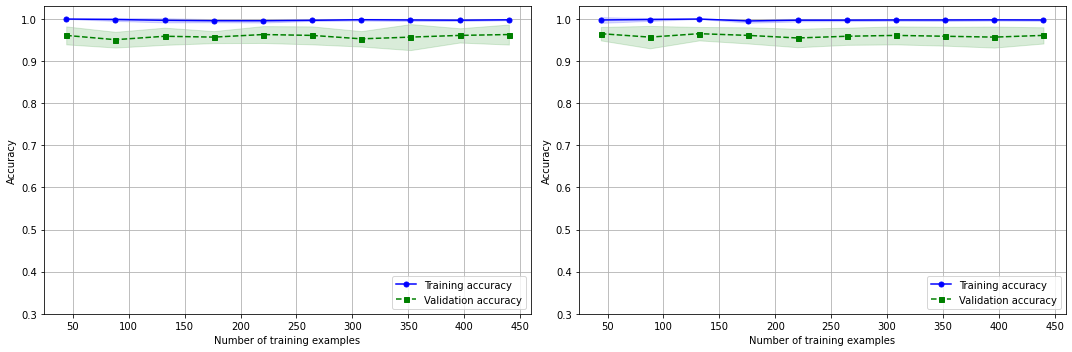

In [39]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

estimators = [x for x in range(5,50+1,5)]
criterion_list = ['gini','entropy']
grid={'n_estimators':estimators, 'criterion':criterion_list}

forest = RandomForestClassifier(random_state=1, n_jobs=-1)
forest_cv=GridSearchCV(forest,grid,cv=5)
forest_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",forest_cv.best_params_)
best_config_gs = forest_cv.best_params_
print("Accuracy CV:",forest_cv.best_score_)
forest_cv = forest_cv.best_estimator_
print('Test accuracy: %.3f' % forest_cv.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 10
random_search = RandomizedSearchCV(forest, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(RandomForestClassifier, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

GridSearch():

Per l'applicazione della GridSearch ci sono 160 combinazioni
Migliore configurazione:  {'algorithm': 'auto', 'n_neighbors': 18, 'weights': 'uniform'}
Accuracy CV: 0.9672207027140753
Test accuracy: 0.967


RandomizedSearch():

Migliore configurazione:  {'weights': 'distance', 'n_neighbors': 20, 'algorithm': 'ball_tree'}
Accuracy CV: 0.9651798863875447
Test accuracy: 0.971


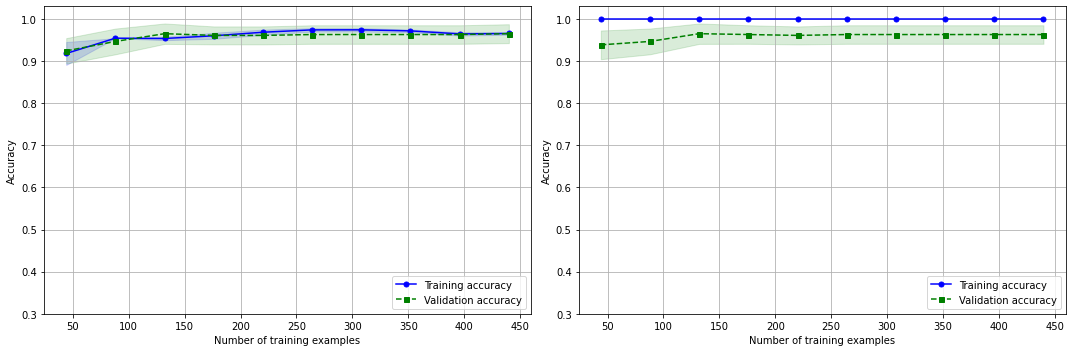

In [40]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


grid={'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights':['uniform', 'distance'], 'n_neighbors':[x for x in range(1,20+1)]}

knn = KNeighborsClassifier(n_jobs = -1)
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",knn_cv.best_params_)
best_config_gs = knn_cv.best_params_
print("Accuracy CV:",knn_cv.best_score_)
knn_cv = knn_cv.best_estimator_
print('Test accuracy: %.3f' % knn_cv.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 10
random_search = RandomizedSearchCV(knn, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(KNeighborsClassifier, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set: 0.96
Accuracy of GNB classifier on test set: 0.96


GridSearch():

Per l'applicazione della GridSearch ci sono 4 combinazioni
Migliore configurazione:  {'kernel': 'linear'}
Accuracy CV: 0.9692825583841784
Test accuracy: 0.967


RandomizedSearch():

Migliore configurazione:  {'kernel': 'rbf'}
Accuracy CV: 0.9652219650746897
Test accuracy: 0.971


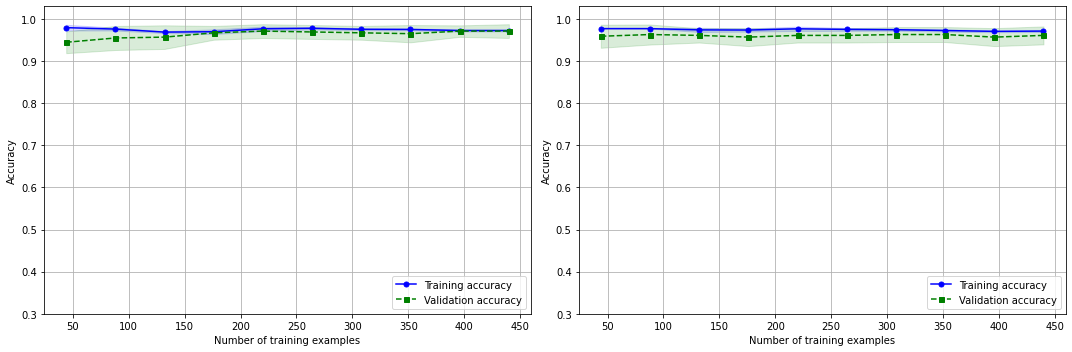

In [42]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

grid={'kernel':kernel_list}
svm=SVC()
svm_cv=GridSearchCV(svm,grid,cv=5)
svm_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",svm_cv.best_params_)
best_config_gs = svm_cv.best_params_
print("Accuracy CV:",svm_cv.best_score_)
svm_be = svm_cv.best_estimator_
print('Test accuracy: %.3f' % svm_be.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 2
random_search = RandomizedSearchCV(svm, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(SVC, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn_cv.predict(x_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[140   3]
 [  4  63]]
              precision    recall  f1-score   support

           2       0.97      0.98      0.98       143
           4       0.95      0.94      0.95        67

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210

